In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
train = pd.read_csv('/content/train_LZdllcl.csv')
test = pd.read_csv('/content/test_2umaH9m.csv')
sample = pd.read_csv('/content/sample_submission_M0L0uXE.csv')

In [ ]:
train.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
train.shape


(54808, 14)

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
train['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


<Axes: xlabel='previous_year_rating', ylabel='Count'>

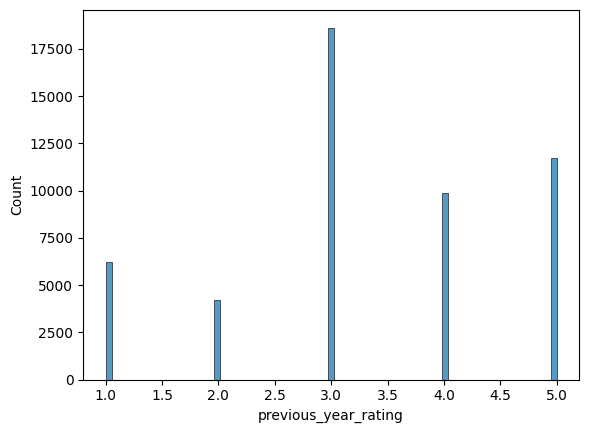

In [ ]:
# classification problem
sns.histplot(x=train['previous_year_rating'])


In [ ]:
# handling missing values

train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(), inplace=True)

# categorical
train['education'].fillna(test['education'].mode()[0], inplace=True)
test['education'].fillna(test['education'].mode()[0], inplace=True)



/tmp/ipython-input-3205506064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)
/tmp/ipython-input-3205506064.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [ ]:
train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [ ]:
test.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [ ]:
# Encoding

 # cannot understand text --> convert to numbers

In [ ]:
train['department'].value_counts(0)  # ont-hot encoding

,count
department,
Sales & Marketing,16840
Operations,11348
Technology,7138
Procurement,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


In [ ]:
train['region'].value_counts()

,count
region,
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659


In [ ]:
train['education'].value_counts()

,count
education,
Bachelor's,39078
Master's & above,14925
Below Secondary,805


In [ ]:
train['gender'].value_counts()

,count
gender,
m,38496
f,16312


In [ ]:
train['recruitment_channel'].value_counts()

,count
recruitment_channel,
other,30446
sourcing,23220
referred,1142


In [ ]:
le = LabelEncoder()

cat_cols = ['department', 'region', 'education', 'gender','recruitment_channel']
for col in cat_cols:
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [ ]:
# split feature& target

x = train.drop('is_promoted', axis=1)  # x->input, y->output
y = train['is_promoted']


In [ ]:
# train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# modeling

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# model evaluation

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("validation Accuracy:", accuracy)

validation Accuracy: 0.9292099981755154


In [ ]:
# train final model on full data

model.fit(x, y)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# predict on test data

test_pred = model.predict(test)

In [34]:
# create submittion file

sample['is_promoted'] = test_pred
sample.to_csv("final_submission.csv", index=False)

In [35]:
# gridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth' : [8, 10, None]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 10, None],
                         'n_estimators': [100, 200]},
             scoring='accuracy')